In [1]:
import torch
import matplotlib.pyplot as plt
# local
import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')

from datasets.import_dataset import import_dataset
from trainer import Trainer
import clamiter as ci
from utils.plotting import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device = {device}')


%load_ext autoreload
%autoreload 2

device = cuda


# SBM

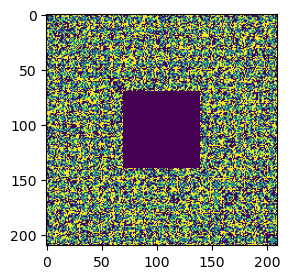

In [2]:
# import sbm and bipartite
ds_sbm_halfdiag = import_dataset('sbm3x3HalfDiag')
ds_sbm_halfcenter = import_dataset('sbm3x3HalfCenter')
plot_adj(ds_sbm_halfcenter.edge_index)


### Lorenz Inner

#### IEClam



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:301:::  
 starting optimization of iegam on sbm3x3HalfDiag on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 4,
        "dim_attr": 64,
        "s_reg": 0.0,
        "l1_reg": 0.05,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 5000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:368:::  
fit wrapper fit_feats, plotting state at iter 4999


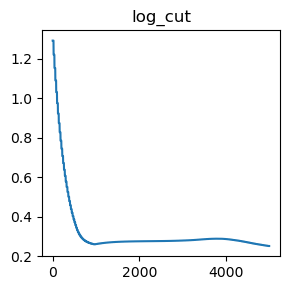

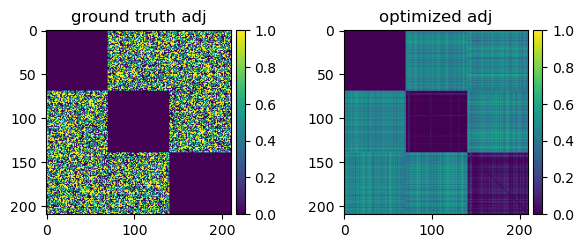

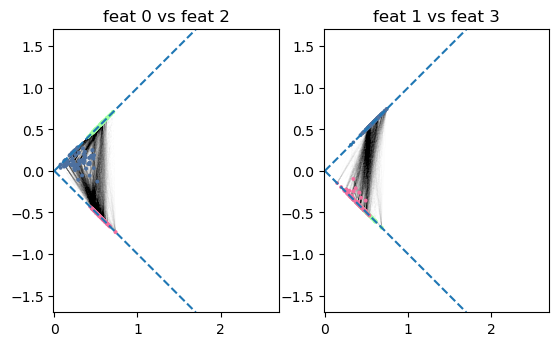



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:409:::  


FINISHED train model on params 
 last accuracies:
log_cut: 0.2510809855558615


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:415:::  





In [18]:
config_triplets = [
                    # ['feat_opt', 'n_iter', 5000],
                    # ['feat_opt', 'lr', 0.00003],
                    # ['prior_opt', 'lr', 0.0000005],
                    # ['back_forth','n_back_forth', 5],
                    # ['back_forth', 'first_func_in_fit', 'feat_opt']
                ]


trainer_halfdiag_iegam = Trainer(
                model_name='iegam',
                task='distance',
                device=device,
                config_triplets_to_change=config_triplets,
                dataset=ds_sbm_halfdiag.clone()
)

losses_halfdiag_iegam, logcut_halfdiag_iegam, l2_halfdiag_iegam = trainer_halfdiag_iegam.train(
    d = 0.2,
    plot_every=-1,
    init_feats=True,
    init_type='small_gaus',
    verbose=False,
    verbose_in_funcs=False
)

# del trainer_halfdiag_iegam.data

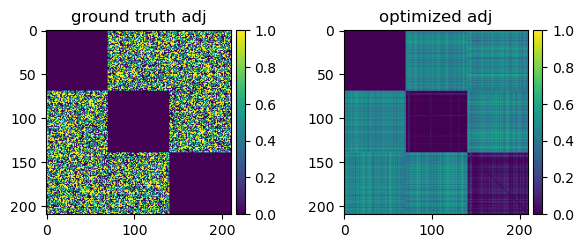

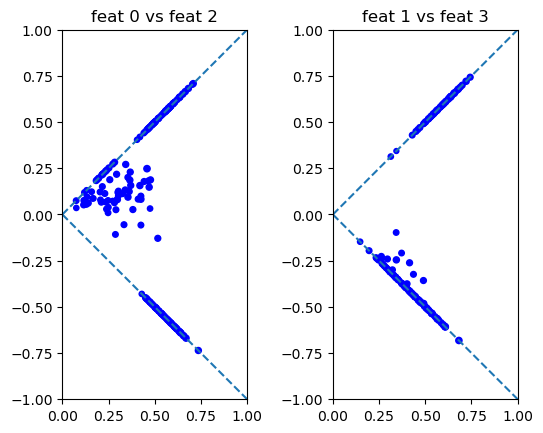

In [20]:
trainer_halfdiag_iegam.plot_state(node_size_factor=5, draw_community_affiliation=False, x_fig_lim=(0, 1), y_fig_lim=(-1,1))


#### PieClam

In [15]:
config_triplets = [
                    # ['feat_opt', 'n_iter', 2000],
                    # ['feat_opt', 'lr', 0.00003],
                    # ['prior_opt', 'n_iter', 1500],
                    # ['prior_opt', 'lr', 0.0000005],
                    # ['back_forth','n_back_forth', 50],
                    # ['back_forth', 'first_func_in_fit', 'feat_opt']
                ]


trainer_halfdiag_piegam = Trainer(
                model_name='piegam',
                task='distance',
                device=device,
                config_triplets_to_change=config_triplets,
                dataset=ds_sbm_halfdiag.clone()
)

losses_halfdiag_piegam, logcut_halfdiag_piegam, l2_halfdiag_piegam = trainer_halfdiag_piegam.train(
    d = 0.2,
    plot_every=-1,
    init_feats=True,
    init_type='small_gaus',
    verbose=False,
    verbose_in_funcs=False
)
del trainer_halfdiag_piegam.data   
del trainer_halfdiag_piegam.clamiter.prior.model



/home/user/Documents/danny/AAAI_pieclam/tests/../trainer.py:311:::  
 starting optimization of piegam on sbm3x3HalfDiag on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 4,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 0.0,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 2000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 2000,
        "lr": 5e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.01,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_forth": 20,
        "scheduler_step_size": 100,
        "scheduler_gamma": 0.5,
        "early_stop_fit": 0,
        "first_func_in_fit": "fit_prior"
    }
}


/home/user/Documents/danny/AAAI_pieclam/tests/../clamiter.py:546:::  
in fit,
first_func_in_fit='fit_prior'
second_function_name='fit_feats'


/home/user/Documents/danny/AAAI_

KeyboardInterrupt: 

### Inner Prod

#### BIGCLAM



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:311:::  
 starting optimization of bigclam on sbm3x3HalfDiag on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 0.01,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 10000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:368:::  
fit wrapper fit_feats, plotting state at iter 9999


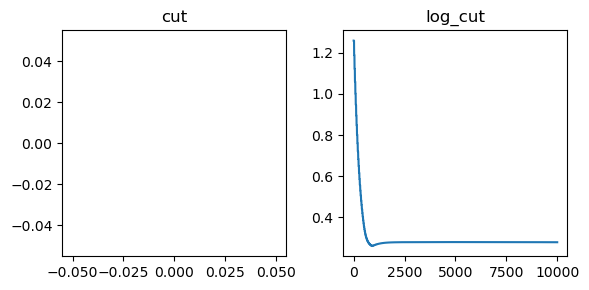



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:727:::  
in plot state, calling function is fit_feats


/home/user/Documents/danny/AAAI_pieclam/experiments/../utils/plotting.py:355:::  
calling_function_name= 'fit_feats' : iter 1/0


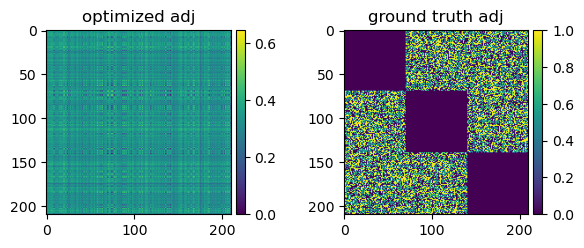

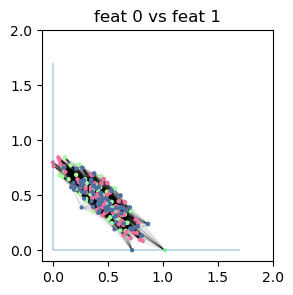

In [4]:
config_triplets = [
                    # ['feat_opt', 'n_iter', 2000],
                    # ['feat_opt', 'lr', 0.00003],
                    # ['prior_opt', 'n_iter', 1500],
                    # ['prior_opt', 'lr', 0.0000005],
                    # ['back_forth','n_back_forth', 50],
                    # ['back_forth', 'first_func_in_fit', 'feat_opt']
                ]


trainer_halfdiag_bigclam= Trainer(
                model_name='bigclam',
                task='distance',
                device=device,
                config_triplets_to_change=config_triplets,
                dataset=ds_sbm_halfdiag.clone()
)

losses_halfdiag_bigclam, logcut_halfdiag_bigclam, l2_halfdiag_bigclam = trainer_halfdiag_bigclam.train(
    d = 0.2,
    plot_every=-1,
    init_feats=True,
    init_type='small_gaus',
    verbose=False,
    verbose_in_funcs=False
)

del trainer_halfdiag_bigclam.data

#### PClam

In [ ]:
# SBM
config_triplets = [
                    # ['feat_opt', 'n_iter', 2000],
                    # ['feat_opt', 'lr', 0.00003],
                    # ['prior_opt', 'n_iter', 1500],
                    # ['prior_opt', 'lr', 0.0000005],
                    # ['back_forth','n_back_forth', 50],
                    # ['back_forth', 'first_func_in_fit', 'feat_opt']
                ]


trainer_halfdiag_pclam = Trainer(
                model_name='pclam',
                task='distance',
                device=device,
                config_triplets_to_change=config_triplets,
                dataset=ds_sbm_halfdiag.clone()
)
# i want to optimize the trainer
losses_halfdiag_pclam, logcut_halfdiag_pclam, l2_halfdiag_pclam = trainer_halfdiag_pclam.train(
    d = 0.2,
    plot_every=5,
    init_feats=True,
    init_type='small_gaus',
    verbose=False,
    verbose_in_funcs=False
)
del trainer_halfdiag_pclam.data
del trainer_halfdiag_pclam.clamiter.prior.model

#### PClam

In [ ]:
# SBM
config_triplets = [
                    # ['feat_opt', 'n_iter', 2000],
                    # ['feat_opt', 'lr', 0.00003],
                    # ['prior_opt', 'n_iter', 1500],
                    # ['prior_opt', 'lr', 0.0000005],
                    # ['back_forth','n_back_forth', 50],
                    # ['back_forth', 'first_func_in_fit', 'feat_opt']
                ]


trainer_halfdiag_pclam = Trainer(
                model_name='pclam',
                task='distance',
                device=device,
                config_triplets_to_change=config_triplets,
                dataset=ds_sbm_halfdiag.clone()
)
# i want to optimize the trainer
losses_halfdiag_pclam, logcut_halfdiag_pclam, l2_halfdiag_pclam = trainer_halfdiag_pclam.train(
    d = 0.2,
    plot_every=5,
    init_feats=True,
    init_type='small_gaus',
    verbose=False,
    verbose_in_funcs=False
)
del trainer_halfdiag_pclam.data
del trainer_halfdiag_pclam.clamiter.prior.model

### Lorenz Inner

#### IEClam

In [ ]:
config_triplets = [
                    # ['feat_opt', 'n_iter', 2000],
                    # ['feat_opt', 'lr', 0.00003],
                    # ['prior_opt', 'n_iter', 1500],
                    # ['prior_opt', 'lr', 0.0000005],
                    # ['back_forth','n_back_forth', 50],
                    # ['back_forth', 'first_func_in_fit', 'feat_opt']
                ]


trainer_halfdiag_iegam = Trainer(
                model_name='iegam',
                task='distance',
                device=device,
                config_triplets_to_change=config_triplets,
                dataset=ds_sbm_halfdiag.clone()
)

losses_halfdiag_iegam, logcut_halfdiag_iegam, l2_halfdiag_iegam = trainer_halfdiag_iegam.train(
    d = 0.2,
    plot_every=-1,
    init_feats=True,
    init_type='small_gaus',
    verbose=False,
    verbose_in_funcs=False
)

del trainer_halfdiag_iegam.data


#### PieClam

In [ ]:
config_triplets = [
                    # ['feat_opt', 'n_iter', 2000],
                    # ['feat_opt', 'lr', 0.00003],
                    # ['prior_opt', 'n_iter', 1500],
                    # ['prior_opt', 'lr', 0.0000005],
                    # ['back_forth','n_back_forth', 50],
                    # ['back_forth', 'first_func_in_fit', 'feat_opt']
                ]


trainer_halfdiag_piegam = Trainer(
                model_name='piegam',
                task='distance',
                device=device,
                config_triplets_to_change=config_triplets,
                dataset=ds_sbm_halfdiag.clone()
)

losses_halfdiag_piegam, logcut_halfdiag_piegam, l2_halfdiag_piegam = trainer_halfdiag_piegam.train(
    d = 0.2,
    plot_every=-1,
    init_feats=True,
    init_type='small_gaus',
    verbose=False,
    verbose_in_funcs=False
)

del trainer_halfdiag_piegam.data
del trainer_halfdiag_piegam.clamiter.prior.model

## HalfCenter

### Lorenz Inner

#### IEClam

In [ ]:
config_triplets = [
                    # ['feat_opt', 'n_iter', 2000],
                    # ['feat_opt', 'lr', 0.00003],
                    # ['prior_opt', 'n_iter', 1500],
                    # ['prior_opt', 'lr', 0.0000005],
                    # ['back_forth','n_back_forth', 50],
                    # ['back_forth', 'first_func_in_fit', 'feat_opt']
                ]


trainer_halfcenter_iegam = Trainer(
                model_name='iegam',
                task='distance',
                device=device,
                config_triplets_to_change=config_triplets,
                dataset=ds_sbm_halfcenter.clone()
)

losses_halfcenter_iegam, logcut_halfcenter_iegam, l2_halfcenter_iegam = trainer_halfcenter_iegam.train(
    d = 0.2,
    plot_every=-1,
    init_feats=True,
    init_type='small_gaus',
    verbose=False,
    verbose_in_funcs=False
)
del trainer_halfcenter_iegam.data

#### PieClam

In [ ]:
config_triplets = [
                    # ['feat_opt', 'n_iter', 2000],
                    # ['feat_opt', 'lr', 0.00003],
                    # ['prior_opt', 'n_iter', 1500],
                    # ['prior_opt', 'lr', 0.0000005],
                    # ['back_forth','n_back_forth', 50],
                    # ['back_forth', 'first_func_in_fit', 'feat_opt']
                ]


trainer_halfcenter_piegam = Trainer(
                model_name='piegam',
                task='distance',
                device=device,
                config_triplets_to_change=config_triplets,
                dataset=ds_sbm_halfcenter.clone()
)

losses_halfcenter_piegam, logcut_halfcenter_piegam, l2_halfcenter_piegam = trainer_halfcenter_piegam.train(
    d = 0.2,
    plot_every=-1,
    init_feats=True,
    init_type='small_gaus',
    verbose=False,
    verbose_in_funcs=False
)
del trainer_halfcenter_piegam.data
del trainer_halfcenter_piegam.clamiter.prior.model

### Inner Prod

#### BIGCLAM

In [ ]:
config_triplets = [
                    # ['feat_opt', 'n_iter', 2000],
                    # ['feat_opt', 'lr', 0.00003],
                    # ['prior_opt', 'n_iter', 1500],
                    # ['prior_opt', 'lr', 0.0000005],
                    # ['back_forth','n_back_forth', 50],
                    # ['back_forth', 'first_func_in_fit', 'feat_opt']
                ]


trainer_halfcenter_bigclam= Trainer(
                model_name='bigclam',
                task='distance',
                device=device,
                config_triplets_to_change=config_triplets,
                dataset=ds_sbm_halfcenter.clone()
)

losses_halfcenter_bigclam, logcut_halfcenter_bigclam, l2_halfcenter_bigclam = trainer_halfcenter_bigclam.train(
    d = 0.2,
    plot_every=-1,
    init_feats=True,
    init_type='small_gaus',
    verbose=False,
    verbose_in_funcs=False
)

del trainer_halfcenter_bigclam.data
del trainer_halfcenter_bigclam.clamiter.prior.model

#### PClam

In [ ]:
# SBM
config_triplets = [
                    ['feat_opt', 'n_iter', 2000],
                    ['feat_opt', 'lr', 0.00005],
                    ['prior_opt', 'n_iter', 1500],
                    ['prior_opt', 'lr', 0.0000005],
                    ['back_forth','n_back_forth', 30],
                    # ['back_forth', 'first_func_in_fit', 'feat_opt']
                ]


trainer_halfcenter_pclam = Trainer(
                model_name='pclam',
                task='distance',
                device=device,
                config_triplets_to_change=config_triplets,
                dataset=ds_sbm_halfcenter.clone()
)
# i want to optimize the trainer
losses_halfcenter_pclam, logcut_halfcenter_pclam, l2_halfcenter_pclam = trainer_halfcenter_pclam.train(
    d = 0.2,
    plot_every=5,
    init_feats=True,
    init_type='small_gaus',
    verbose=False,
    verbose_in_funcs=False
)

del trainer_halfcenter_pclam.data
del trainer_halfcenter_pclam.clamiter.prior.model